# Assignment 1. Determine the type of data
Explain the difference between categorical and numerical data !



1.   Categorical variables take category or label values and place an individual into one of several groups
2.   Quantitative variables take numerical values and represent some kind of measurement





---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   object
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
df = df.sample(1000)

<h2>Assignment 2. Scatter Plot Visualization with data that contains missing values</h2>

In this assignment, we will take a look at the value of DewPountAvg (F) by observing the value of HumidityAvg (%), TempAvg (F), and WindAvg (MPG)

Actually this data is not yet ready to be analyzed. Some type of the columns are still recognized as an object (DewPointAvg, HumidityAvg, WindAvg), even though the contained data is numeric. So, convert that data types into the float data type.

It is not easy to change that data type because there is some rows that contains '-' and 'na' as its value that is described as missing value. So, change that missing value data type into NaN. Then, create a graphical visualization using scatter plot with sample(1000), to show the expected result as the below graphs.

Note :
- Use 'coolwarm' colormap
- Use color for every data point refers to the value from 'TempAvgF' columns.
- Use size for every data point refers to the value of 'WindAvgMPH', multiply it by 20 to make it look bigger.

Then, compare data visualization above with the data visualization after handling the missing value :
Fill the NaN value with the value from the previous row by using .fillna() method with the method value as 'ffill' its argument.

#                     **Expected output**

#                     **Without Handling the Missing Value**

![Without Handling the Missing Value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **With Handling the Missing Value**
![With Handling the Missing Value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

In [ ]:
df.columns.tolist()
df[['TempAvgF',
'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH']] = df[['TempAvgF','DewPointHighF',
'DewPointAvgF',
'DewPointLowF',
'HumidityHighPercent',
'HumidityAvgPercent',
'HumidityLowPercent',
'SeaLevelPressureHighInches',
'SeaLevelPressureAvgInches',
'SeaLevelPressureLowInches',
'VisibilityHighMiles',
'VisibilityAvgMiles',
'VisibilityLowMiles',
'WindHighMPH',
'WindAvgMPH',
'WindGustMPH']].apply(pd.to_numeric,downcast='float',errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 770 to 987
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1000 non-null   object 
 1   TempHighF                   1000 non-null   int64  
 2   TempAvgF                    995 non-null    float32
 3   TempLowF                    1000 non-null   int64  
 4   DewPointHighF               995 non-null    float32
 5   DewPointAvgF                994 non-null    float32
 6   DewPointLowF                995 non-null    float32
 7   HumidityHighPercent         998 non-null    float32
 8   HumidityAvgPercent          992 non-null    float32
 9   HumidityLowPercent          998 non-null    float32
 10  SeaLevelPressureHighInches  998 non-null    float32
 11  SeaLevelPressureAvgInches   998 non-null    float32
 12  SeaLevelPressureLowInches   998 non-null    float32
 13  VisibilityHighMiles         991 

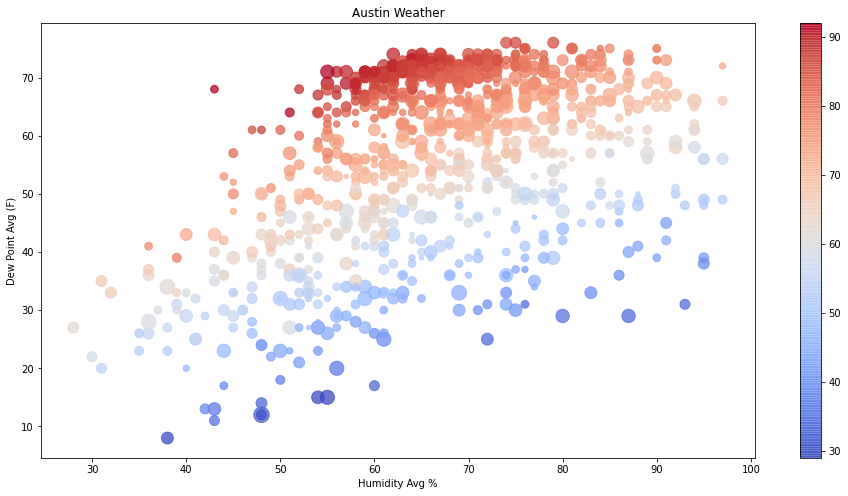

In [ ]:
# Without handling the missing value

fig, ax = plt.subplots(figsize=(16, 8))
HAP = df['HumidityAvgPercent']
DPAF = df['DewPointAvgF']
TAF =  df['TempAvgF']
WAM = df['WindAvgMPH']

axmap = ax.scatter(HAP, DPAF, alpha=0.75, c=TAF, s=WAM*20, cmap='coolwarm')

ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')

fig.colorbar(axmap)
plt.style.use('default')
plt.show()

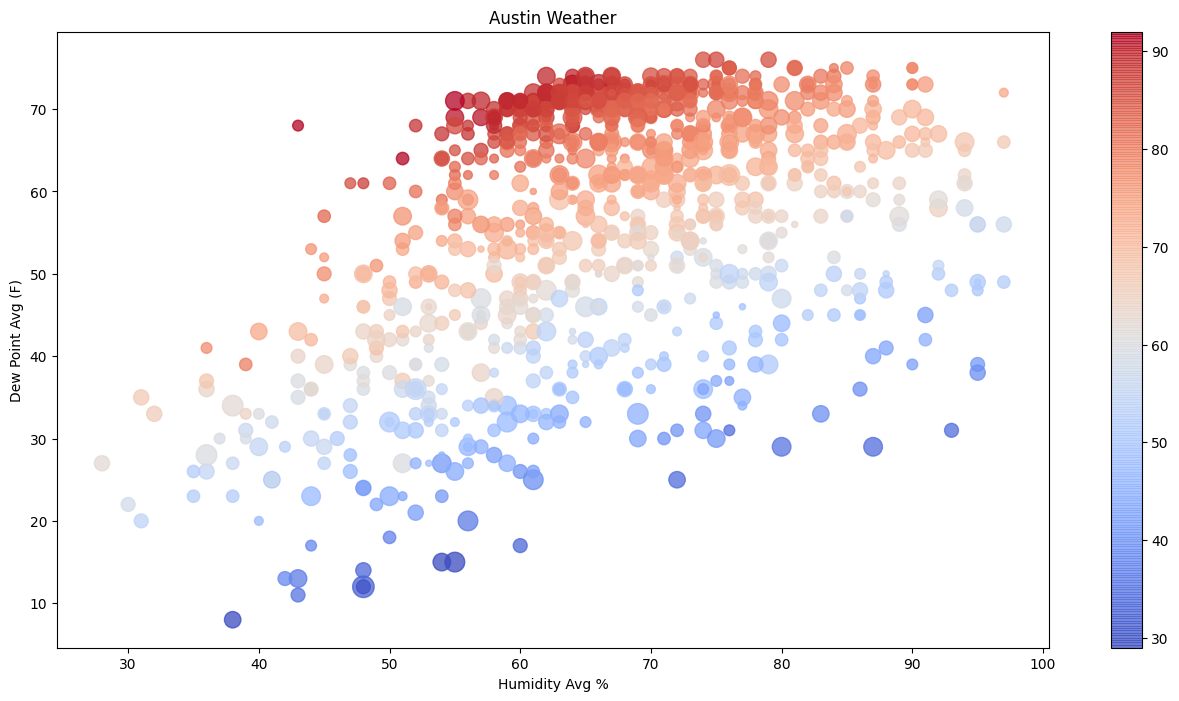

In [ ]:
# Handled missing value

df.fillna(method='ffill')

fig, ax = plt.subplots(figsize=(16, 8))
HAP = df['HumidityAvgPercent']
DPAF = df['DewPointAvgF']
TAF =  df['TempAvgF']
WAM = df['WindAvgMPH']

axmap = ax.scatter(HAP, DPAF, alpha=0.75, c=TAF, s=WAM*20, cmap='coolwarm')

ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')

fig.colorbar(axmap)
plt.style.use('default')
plt.show()

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [ ]:
df2 = pd.read_csv('price.csv')
df2.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Observation    936 non-null    int64  
 1   Dist_Taxi      923 non-null    float64
 2   Dist_Market    923 non-null    float64
 3   Dist_Hospital  935 non-null    float64
 4   Carpet         928 non-null    float64
 5   Builtup        921 non-null    float64
 6   Parking        936 non-null    object 
 7   City_Category  936 non-null    object 
 8   Rainfall       936 non-null    int64  
 9   House_Price    936 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 73.2+ KB


---

<h2>Assignment 3. Data Visualization wtih Handling Outliers </h2>

In this assignment, we will handle the outliers of data. Outliers can be found from 'House_Price' column by using boxplot from seaborn library as this below graph :



![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


By using Interquartile range, we can find the outliers of the data and also remove it 


*   Find the upper bound and the lower bound of that Interquartile Range
*   Remove that outliers by using the upper bound and the lower bound
*   Visualize the processed data to produce the expected result








**EXPECTED OUTPUT:**

Lower bound & upper bound:

871625.0 10976625.0

Boxplot Visualization:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)





In [ ]:
# First quartile (Q1)
Q1 = np.percentile(df2['House_Price'], 25, interpolation = 'midpoint')
# Third quartile (Q3)
Q3 = np.percentile(df2['House_Price'], 75, interpolation = 'midpoint')
# IQR
IQR = Q3-Q1

# Lower Bound
Lb = Q1-(IQR*1.5)
print('Lower Bound = ' + str(Lb))

# Upper Bounds
Ub = Q3+(IQR*1.5)
print('Upper Bound = ' + str(Ub))

Lower Bound = 862750.0
Upper Bound = 10988750.0


In [ ]:
# Replacing the outliers of House_Price to lower or upper bound

List_House_Price = df2['House_Price'].tolist()

for i in range(len(List_House_Price)) :
  if List_House_Price[i] < Lb :
    List_House_Price[i] = Lb
  elif List_House_Price[i] > Ub :
    List_House_Price[i] = Ub
  else :
    pass

df2['House_Price'] = List_House_Price

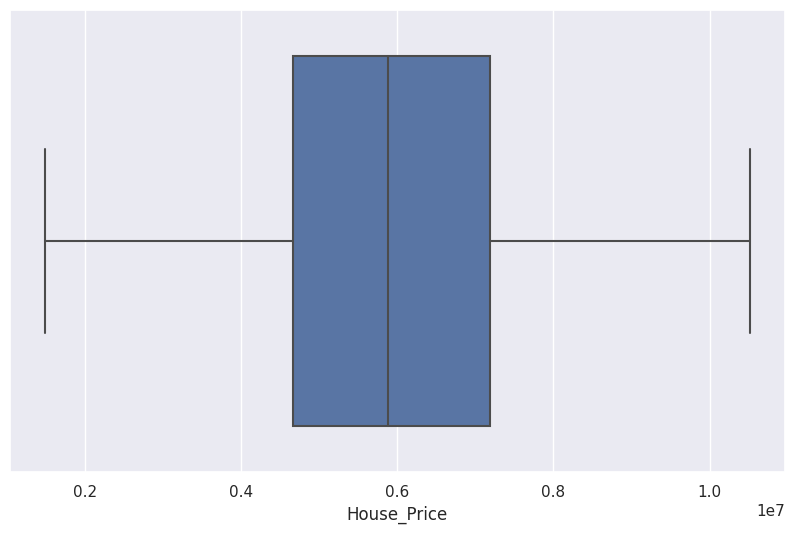

In [ ]:
# Plotting the boxplot

import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.boxplot(x=df2['House_Price'], showfliers=False)